In [1]:
### TechnoHacks - Machine learning intern batch 11
### Task 3 : 4# Image Classification
### Task description : Use the CIFAR-10 dataset to build a model that can classify images into 10 different categories
### The used algorithm is CNN with accuracy 70.13%
### done by Nada Mossad Mohamed Ahmed Abodegham

In [2]:
# Uploading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay ,precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
# Preparing data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 716s 4us/step


In [4]:
# Preparing the ten categories (as mentioned in the CIFAR-10  dataset)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
# Prepare the model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
# Train the model
training_results = model.fit(train_images, train_labels, epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 43s 26ms/step - loss: 1.5090 - accuracy: 0.4478 - val_loss: 1.2345 - val_accuracy: 0.5501
Epoch 2/8
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1603 - accuracy: 0.5872 - val_loss: 1.1579 - val_accuracy: 0.5908
Epoch 3/8
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0066 - accuracy: 0.6462 - val_loss: 1.0199 - val_accuracy: 0.6341
Epoch 4/8
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9097 - accuracy: 0.6799 - val_loss: 0.9251 - val_accuracy: 0.6762
Epoch 5/8
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8379 - accuracy: 0.7058 - val_loss: 0.9438 - val_accuracy: 0.6757
Epoch 6/8
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7809 - accuracy: 0.7258 - val_loss: 0.8733 - val_accuracy: 0.6994
Epoch 7/8
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7282 - accuracy: 0.7440 - val_loss: 0.8949 - val_ac

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 10ms/step - loss: 0.8844 - accuracy: 0.7013
Test Loss: 0.8843932747840881
Test Accuracy: 0.7013000249862671


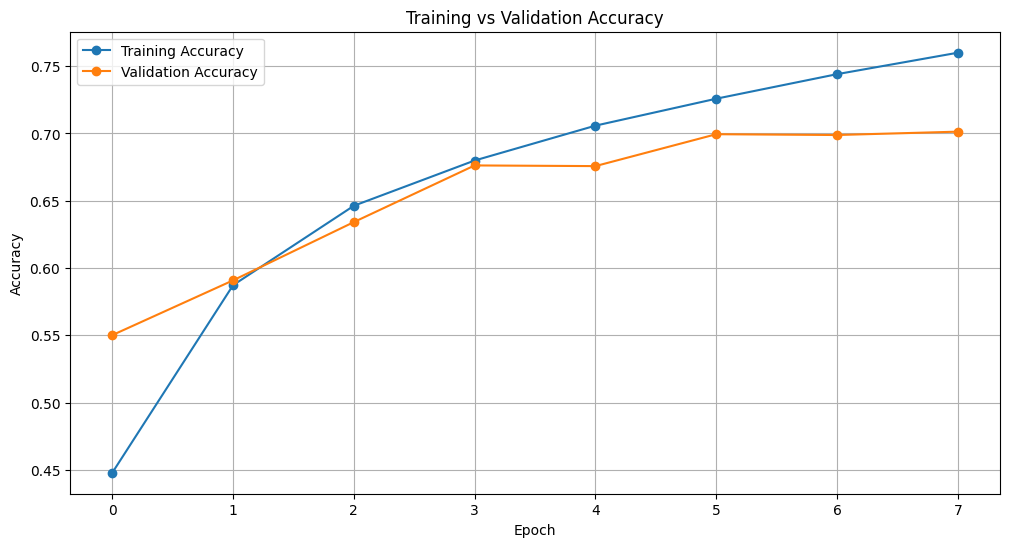

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(training_results.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_results.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

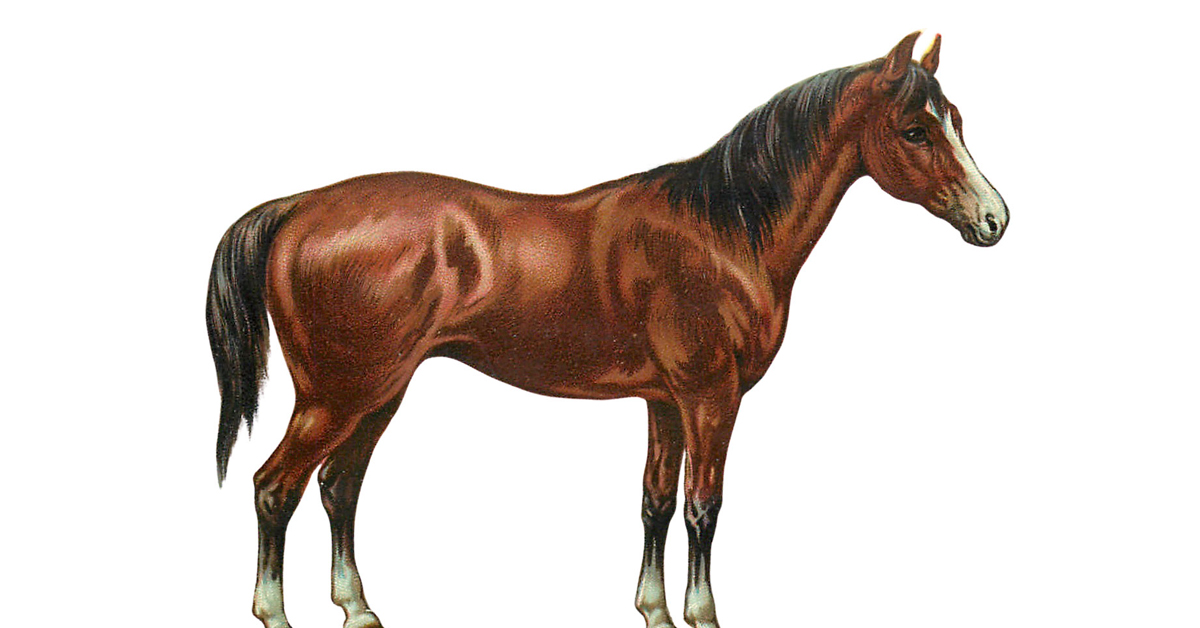

In [29]:
# Showing the image that we will test by
from IPython.display import Image, display
display(Image(filename="horse.jpg"))

In [30]:
# Testing the model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

img = image.load_img("horse.jpg", target_size=(32, 32))  
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
pred = model.predict(img)
predicted_index = np.argmax(pred)
predicted = class_names[predicted_index]
predicted

1/1 [==============================] - 0s 32ms/step


'horse'